# Test - Sticky NFT Marketplace

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

## Question 2

In [2]:
# Obtaining list of percentages of cancellations
p=[10]*24
for x in list(range(0,10)):
    p[x]=p[x]+10-x

# Converting the integer list p into a list of floats
f=list(np.float_(p))

for y in list(range(0,len(f))):
    f[y]=f[y]/100.0
print(f)

[0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


### (a) Average lifetime of a subscriber

In [3]:
# Total payments calculator
lifetime = 0
tot = 0
term = 0.54 # The initial value is the conversion rate of free trials
for m in list(range(1,25)):
    for k in list(range(0,m - 1)):
        term *= 1 - f[k]
    tot += term

# Lifetime calculator
term = 0.54
for m in list(range(1,25)):
    for k in list(range(0,m - 1)):
        term *= 1 - f[k]
    lifetime += m * term / tot
    
# Lifetime in months
lifetime

2.2575605538809214

So, users stay subscribed for an average of 2 months after their free trial ends.

### (b) Average number of subscriptions

In [4]:
#Subscription conversion rate
crate=0.54

#Average number of monthly free trials
Ntrial = 2243

#Average number of converted subscriptions
Nconv = 0.54 * 2243

#Multiplicative factor
sub10 = 0
sub11up = 0

# From the 11th month forward
sub11up = 0.9 ** 10/(1-0.9) # Geometric series

# From first to the 10th month
for m in list(range(1,11)):
    term = 1
    for k in list(range(0,m)):
        term *= 1 - f[k]
    sub10 += term

#Average number of monthly subscriptions
print('<=10 month subscriptions:', Nconv * sub10, '\n', '>10 month subscriptions', Nconv * sub11up, '\n', 
      'Total subscriptions:', Nconv * (sub10 + sub11up))

<=10 month subscriptions: 4849.746380519314 
 >10 month subscriptions 4223.263002179222 
 Total subscriptions: 9073.009382698536


## Question 3

#### General Properties of the dataset

In [5]:
# Define the present working directory (pwd)
pwd = os.getcwd()
read_str = pwd + '\\Question3.xlsx'

# Reading the dataset
data = pd.read_excel(read_str)

# Print the shape of the dataset (lines, columns)
print('\nData shape: ', data.shape)

# Count duplicated rows
bool_series = data.duplicated(keep ='first')
print('\nNumber of duplicated rows: ', sum(bool_series))

# Count the missing values in each column
print('\nMissing Values in each column:')
for col in data.columns:
    missing_data = data[col].isnull().sum()
    if missing_data > 0:
        print('\n\t',col, missing_data, "{0:.2%}".format(missing_data / data.shape[0]))

# Count the distinct values in each column
print('\nNumber of unique values in each column:\n')
index = 0
for col in data.nunique():
    print('\tColumn', index, ': ', col)
    index += 1

# Identify the data types of each column
print('\nColumn data types:\n')
index = 0
for col in data.dtypes:
    print('\tColumn', index, ': ', col)
    index += 1


Data shape:  (85, 3)

Number of duplicated rows:  0

Missing Values in each column:

Number of unique values in each column:

	Column 0 :  85
	Column 1 :  83
	Column 2 :  84

Column data types:

	Column 0 :  object
	Column 1 :  int64
	Column 2 :  int64


### (a) What can you tell us about the relation between $S$ and $A$?

To answer this question, we superimpose the graphs of $S$ and $A$, as a function of each day(index).

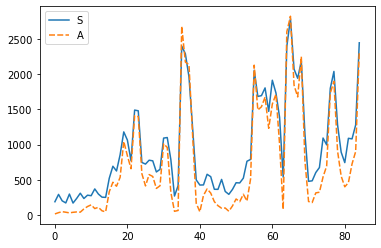

In [6]:
# Ignore the date column
df=data.loc[:, ['S','A']]

# Plot the data
sns.lineplot(data=df);

As it can be inferred from the graph, $S$ is a reasonable predictor of the absolute value of larger values of $A$. In smaller values, there are clear deviations from $A$, but the overall tendency (rises and falls) seems to match $A$ pretty well. We confirm this by plotting the derivatives of both curves.

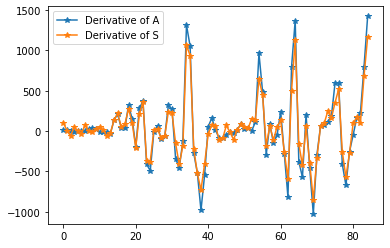

In [7]:
# The derivatives will be with respect to the index
dx = 1
x = np.arange(0,df['S'].shape[0]) # defines the x axis vector, which spans the size of the data vector S or A

# We calculate the derivative of A with np.gradient
plt.plot(x,np.gradient(df['A'], dx), '-*', label='Derivative of A');

# We compare it with the derivative of S
plt.plot(x,np.gradient(df['S'], dx), '-*', label='Derivative of S');
plt.legend()

This means that while we cannot expect, in general, to trust the value of $S$, we can trust the predicted tendency; if $S$ rises/drops, then we should expect a corresponding rise/drop in the business metric $A$.

### (b) How useful is $S$ as an estimate of $A$?

#### Average Percentual Error

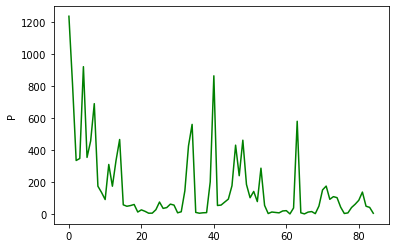

In [8]:
df['P'] = 100*abs(df['S']-df['A'])/df['A'] # Creates a new column P, which stands for percentual error
sns.lineplot(data=df['P'], color = 'green');

As shown in the above graph, the percentual error can be quite large (above 1000% in the first value). From the conclusions of the previous section, we noted that the curve of $S$ matches $A$ for larger values of the business metric. To further investigate this hypothesis, we have plotted the percentual error as a function of the value of $A$.

#### Average Percentual Error by value of the business metric $A$

In [9]:
# Creating triplets of (A, P, S), where P is the percentual error.
df['Triples'] =  list(zip(df.A, df.P, df.S))

# Sorting the triplets according to ascending values of A
sorted_df = sorted(df['Triples'], key=lambda tup: tup[0])

# Breaking down the triplets into separate columns, sorted by the value of A
df2 = pd.DataFrame()
df2['sortedA'] = df['A']
df2['sortedP'] = df['P']
df2['sortedS'] = df['S']
for x in range(0, len(df2['sortedA'])):
    df2['sortedA'].iloc[x] = df['Triples'].iloc[x][0]
    df2['sortedP'].iloc[x] = df['Triples'].iloc[x][1]
    df2['sortedS'].iloc[x] = df['Triples'].iloc[x][2]

C:\Users\tomat\AppData\Local\Temp\ipykernel_13932\279837152.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sortedA'].iloc[x] = df['Triples'].iloc[x][0]
C:\Users\tomat\AppData\Local\Temp\ipykernel_13932\279837152.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sortedP'].iloc[x] = df['Triples'].iloc[x][1]
C:\Users\tomat\AppData\Local\Temp\ipykernel_13932\279837152.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

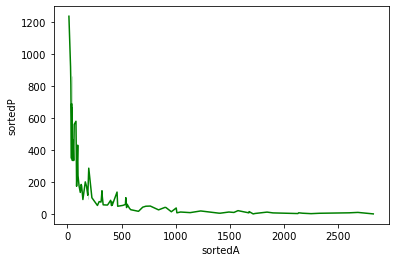

In [10]:
sns.lineplot(data=df2, y = df2['sortedP'], x = df2['sortedA'], color = 'green');

From the graph, we confirm our hypothesis: the percentual error is, approximately, a decreasing function of the value of $A$. Consequently, we can define a certain threshold $T$ (a value of the business metric $A$) such that the percentual error falls below a value of our choosing. For example, if we choose this value to be 20%, then:

In [11]:
# Ignore values where our model has a percentual error of above 20% 
df3 = df2.loc[df2['sortedP'] <= 20, :]
T=df3['sortedA'].iloc[0]
T

1044

Where we conclude that our $S$ threshold, for 20% maximum percentual error, is $T = 1044$.

### (c) If on a given day $S = 500$, what is your estimate of $A$ for that day (and how did you get it)?

By using the sorted dataframe df3, we can visualize the approximate linear relationship between the business metric $A$ and our model, $S$.

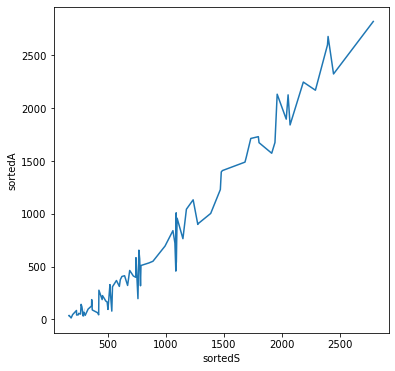

In [12]:
plt.figure(figsize=(6,6))
sns.lineplot(y = df2['sortedA'], x = df2['sortedS']);

To estimate $A$ based on the value of $S$, it would be reasonable to use a linear model $(A = m \times S + b)$.

In [13]:
# Simple linear regression using scipy
x = np.array(df2['sortedS'])
y = np.array(df2['sortedA'])
scipy.stats.linregress(x, y)

LinregressResult(slope=1.0989249312348905, intercept=-310.5622369729607, rvalue=0.9834967722480007, pvalue=2.0924904578177835e-63, stderr=0.0221899455626486, intercept_stderr=25.551671730357505)

Which means our function is $A = (1.10 \pm 0.02) \times S + (-310.56 \pm  25.55)$. Substituting $S = 500$ in this function, we estimate $A \approx 239 \pm 36$.